# Introduction to Machine Learning using the iris dataset

# Data download
The iris dataset is one of the most popular datasets to start with ML. It can be downloaded easily from the scikit-learn python package.

The dataset that we are dealing with is suited for a classification problem. A classification problem involves predicting the class ("target" variable) of a certain entity based on observed data ("features"). A dataset like this one, which has both the target and the features is known as a "training dataset".

The training dataset contains a collection of associations between the features and the target variable. Our goal is to come up with an algorithm that is able to produce with good predictions for the target variable based solely on the observed features. Let us download the data and have a look at the table that contains it.

Supervised Learning is the general term that includes the process of learning these associations between one or more target variables and one or more feature variables, so that we can predict the value of the target variables based on the values of the features. There are two types of supervised learning problems:

- **Classification**: the target variable is discrete.
- **Regression**: the target variable is continuous.

When people think about ML, Supervised Learning is usually what comes to mind first. However, there are some other problems that are also typically included within the ML framework, such as Unsupervised Learning or Reinforcement Learning, but these are usually taught afterwards and they are not so widely used overall (of course, this depends on the particular knowledge or business domain).

In [1]:
from sklearn import datasets
import pandas as pd

iris_frame = datasets.load_iris(as_frame=True)
iris_df = iris_frame["frame"]
print(f"Dataframe dimensions: {iris_df.shape}")
iris_df.head()


Dataframe dimensions: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature_columns = [colname_i for colname_i in iris_df.columns if "(cm)" in colname_i]

print("Feature columns:", feature_columns)

Feature columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Preliminary EDA
This dataset is very easy to work with, it already contains explicitly the features and the target variable. This is not normally the case, and getting up to this point usually takes a large amount of time and effort.

We could directly try to apply a classification algorithm to this problem. This could be a good idea if we are already familiar with the problem and we know an approach that is likely to work well. However, this is not normally the case if we are approaching a new problem, and therefore, it is always a good idea to explore the data a bit to try to understand it better.

Let's perform a simple EDA analysis to get ourselves familiar with the problem.

## Target variable examination
We can start by looking at the target variable to get a better idea of its distribution. For classification problems, it is important to evaluate the balance between the different classes. Can you guess why?

In [3]:
# How many values are there in target?
iris_df["target"].unique()

array([0, 1, 2])

In [4]:
# Which are the species that correspond to each of the labels on the target variable?
iris_frame["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Let's get the proportions of the different target labels
iris_df["target"].value_counts() / iris_df.shape[0]

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

## Features examination
Once we have performed a univariate analysis of the target, we can continue by focusing on the features. The type of features (discrete vs continuous) and the way their distributions look like can give us clues on how to approach the problem better.

Above all, there are two aspects that we need to keep in mind: nulls and variance. What would happen if a column has no variability and/or if it has a lot of null values?

In [6]:
iris_df[feature_columns].describe()
# All the variables have a certain degree of variability, which means that, in principle,
# they all might be useful for making predictions

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Let's have a look at the number of nulls on each column
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

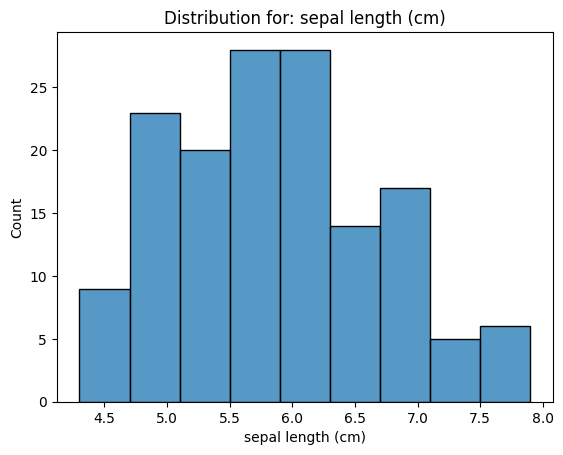

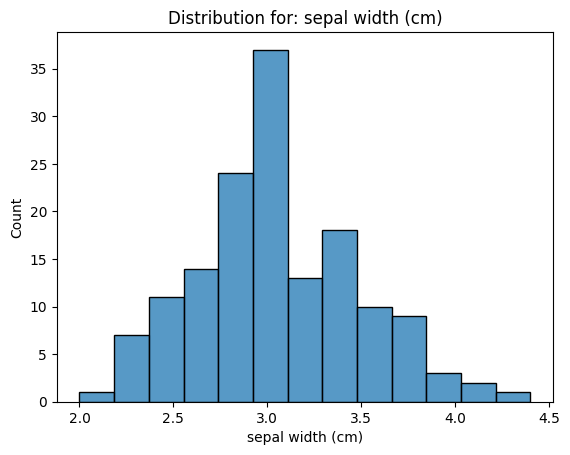

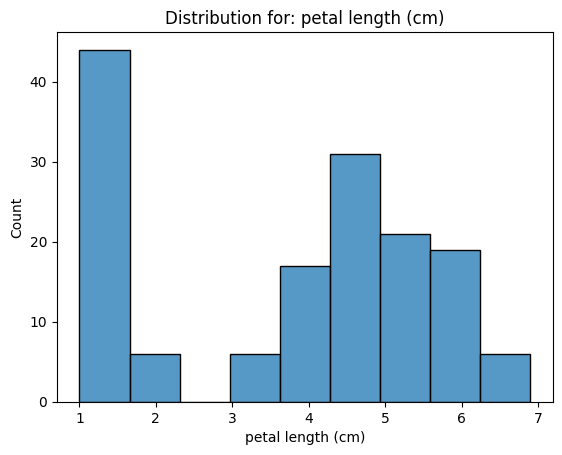

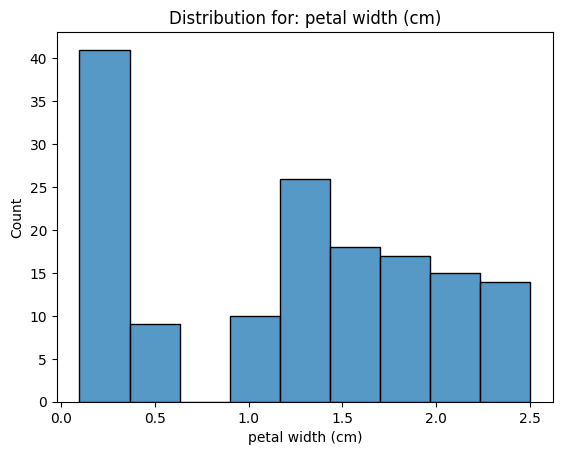

In [8]:
# Let's visualize the distribution of the features. This could give us some clues in order
# to choose a suitable algorithm

# Can you see a pattern that could be helpful for making predictions?

import seaborn as sns
import matplotlib.pyplot as plt

for feature_i in feature_columns:
    ax = sns.histplot(iris_df[feature_i])
    ax.set_title(f"Distribution for: {feature_i}")
    plt.show()

## Multivariate analysis features vs target
Once we have explored the features and the target separately, we can try to visualize the relationship between them. This can be very useful when it comes to choose and appropriate model, but we need to keep in mind that it is difficult to represent more than two dimensions together, so we will need to choose the right visualization so that we can confirm certain patterns.

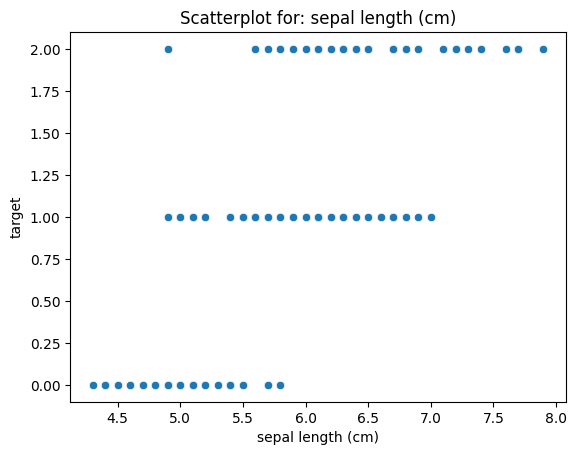

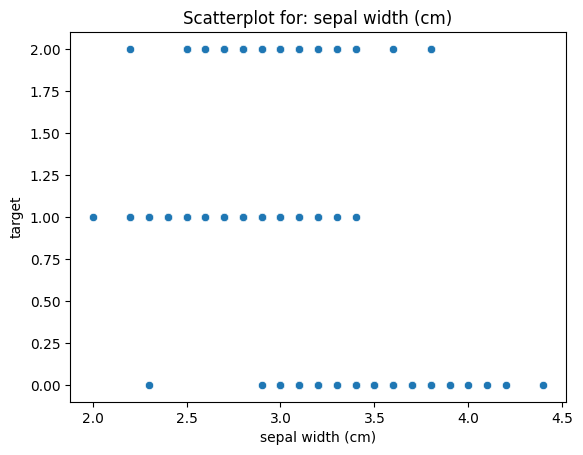

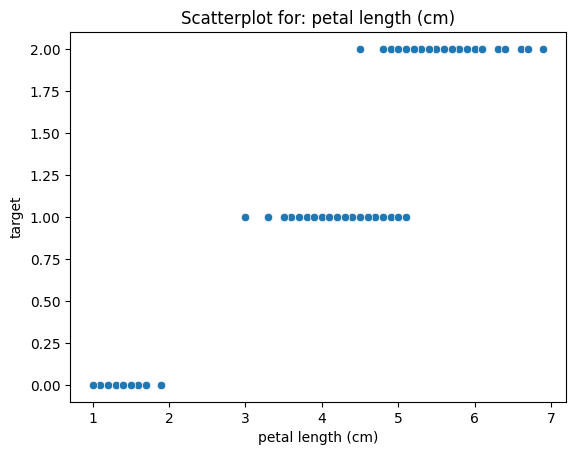

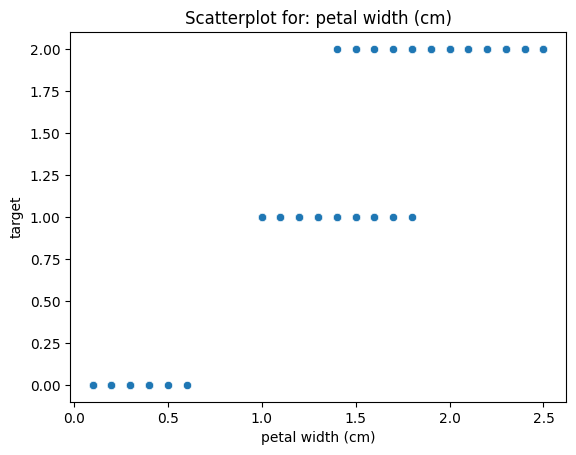

In [9]:
# The most obvious way to represent the relationship between targets and features is to
# make use of scatterplots. How useful do you think they are?
for feature_i in feature_columns:
    ax = sns.scatterplot(x=feature_i, y="target", data=iris_df)
    ax.set_title(f"Scatterplot for: {feature_i}")
    plt.show()

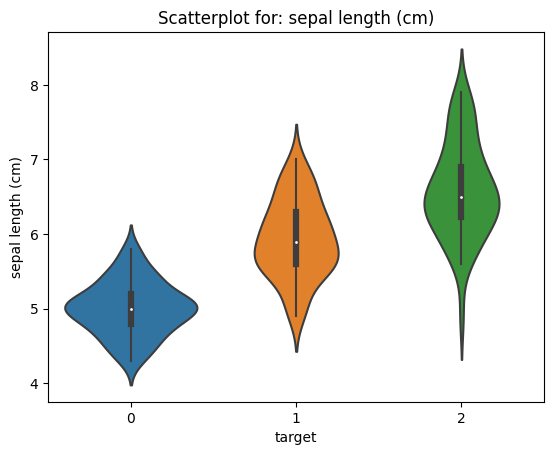

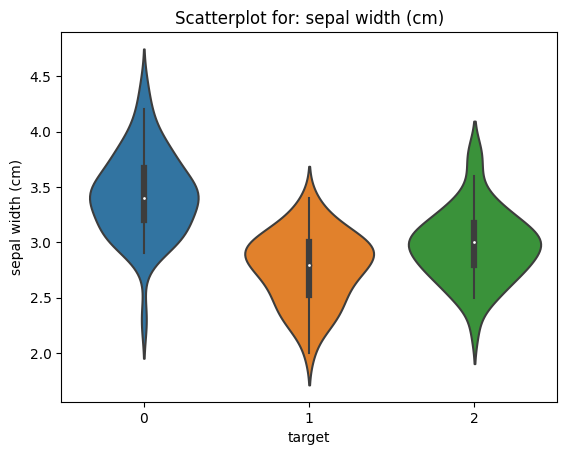

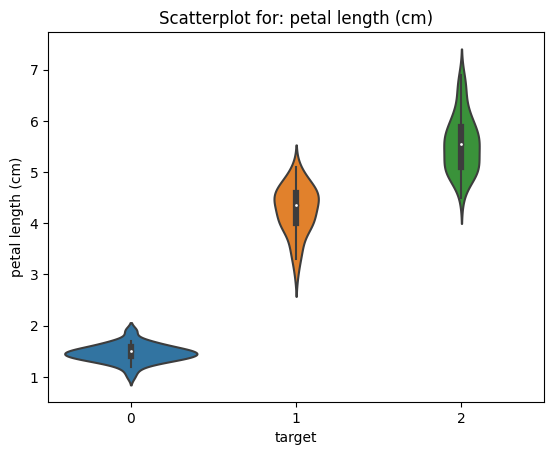

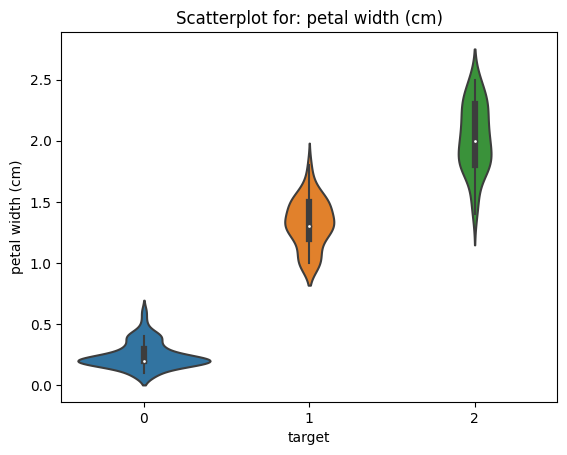

In [10]:
# This is a better example of how to visualize the relationship between features and the
# target variable for this particular problem. It allows us to gain insights on the distributions
# of the target variables and how they relate to the target variable

# Could you guess the most probable target value based on a given value for one
# of the feature variables?
for feature_i in feature_columns:
    ax = sns.violinplot(y=feature_i, x="target", data=iris_df)
    ax.set_title(f"Scatterplot for: {feature_i}")
    plt.show()

[('sepal length (cm)', 'sepal width (cm)'), ('sepal length (cm)', 'petal length (cm)'), ('sepal length (cm)', 'petal width (cm)'), ('sepal width (cm)', 'petal length (cm)'), ('sepal width (cm)', 'petal width (cm)'), ('petal length (cm)', 'petal width (cm)')]


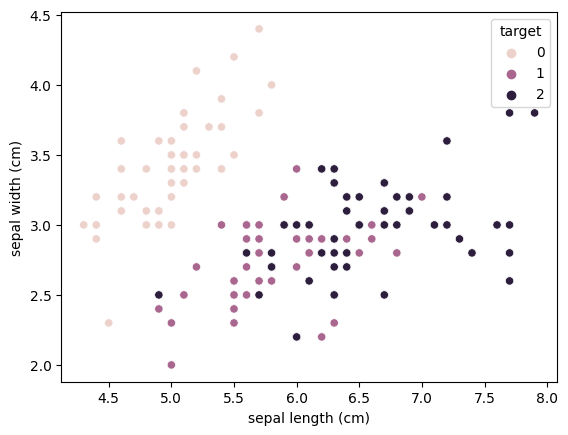

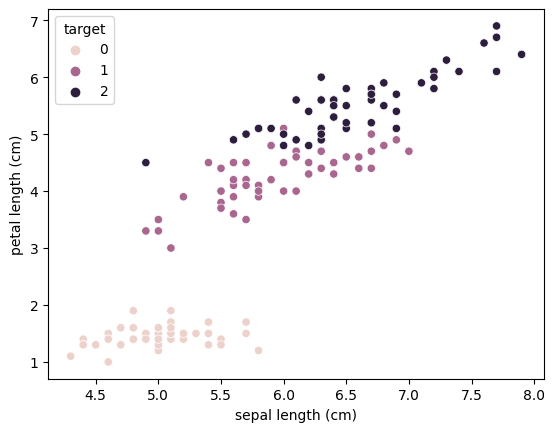

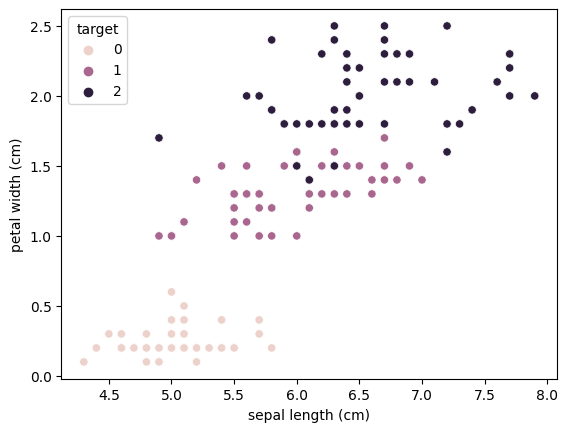

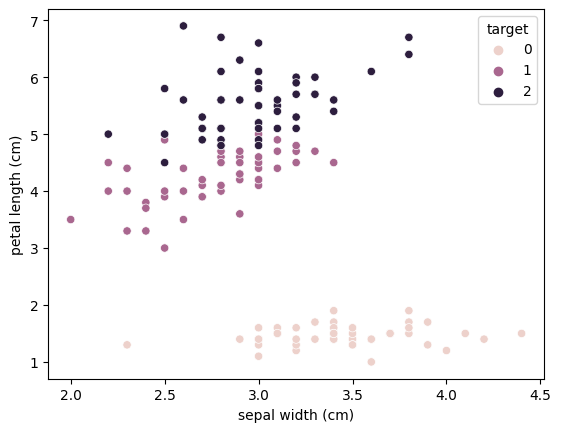

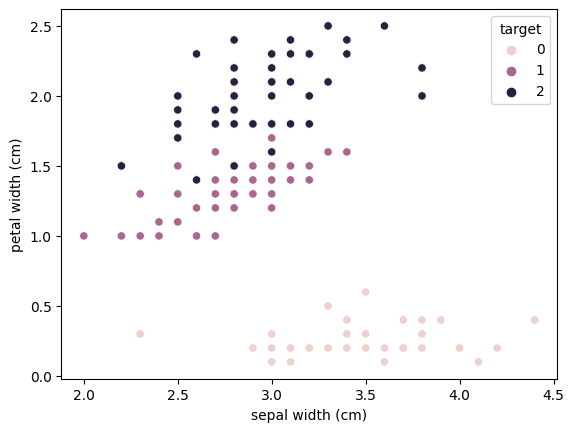

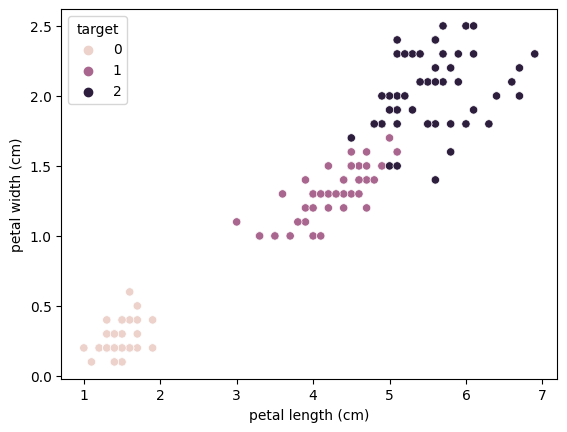

In [11]:
from itertools import combinations

# Let us generate all the possib
all_feature_combos = list(combinations(feature_columns, 2))
print(all_feature_combos)

for var_1, var_2 in all_feature_combos:
    sns.scatterplot(x=var_1, y=var_2, hue="target", data=iris_df)
    plt.show()

Different ways of visualizing the data give us different patterns that could be exploited in order to make predictions. For instance, the violin plots reflects a more probabilistic approach to the problem, whereas the scatter plots illustrates a more geometry-based approach. Let's see how we can exploit each of these with two different models.

# Modelling workflow examples

Let us try to build two models that are related to the patterns that we have discovered in our exploratory analysis.

We will start with the geometry-inspired model, because it is one of the simplest ML modes out there, and yet it can be a very useful tool for certain problems.

## kNN model
The kNN(k-Nearest Neighbors) model is one of the simplest Supervised Learning algorithms out there. It relies on the concept of distance to make predictions, and it assumes that close instances should have similar target values. You can discover more about it here: [Nearest Neighbors in Sklearn](https://scikit-learn.org/stable/modules/neighbors.html). The basic idea is that, given a point in the feature space, we calculate the closest k points in our training set, and we assign the most frequent target value found among the computed neighbors.

The most distinctive feature of this model is that there is really no model, there are no parameters to be trained, there is no optimization problem. The model is the data itself, and therefore this allows us to make predictions without having to invest time in model training, which can be a huge advantage over other models. For this reason, it is a great model to use as a baseline, in order to evaluate whether the transition to a more complex model is worth it or not.

Let us use this model to illustrate how the usual modelling workflow looks like in scikit-learn.

In [12]:
# The first step is to import the model and create an instance of it
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # When creating an instance of a model, we will
# normally need to introduce the so-called "hyperparameters". Correctly choosing those
# can have a significant impact on performance, and this task is already a problem itself.
# Usually, we should be able to find a recommended set of values to start with, in this
# case, we will start with 3 hyperparameters

Using a Supervised Learning model implies that there will always be a certain margin of error. For this reason, it is important to quantify the degree of certainty that we can expect from our models. There are several different approaches for this, we will explore the simplest one, which is the train-test split. We will take a big proportion of the data for training (usually between 70%-90% of the available data, depending on the size of the dataset) and the remaining part for testing. We will train ONLY with the training data, and use the testing data to check how off are our predictions from the expected values.

In [13]:
# We can manually get the train and test sets from the original dataset using pandas,
# but we can also use the corresponding sklearn function instead.
from sklearn.model_selection import train_test_split
x = iris_df[feature_columns].values
y = iris_df[["target"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Dimensions x train: ", x_train.shape)
print("Dimensions y train: ", y_train.shape)
print("Dimensions x test: ", x_test.shape)
print("Dimensions y test: ", y_test.shape)

Dimensions x train:  (105, 4)
Dimensions y train:  (105, 1)
Dimensions x test:  (45, 4)
Dimensions y test:  (45, 1)


In [14]:
# Now we can run the fit() method on the classifier object, which is usually called for
# training the model. For kNN, there is no training process as such, instead the relevant
# data is stored so that we can use the object to make predictions.
clf.fit(X=x_train, y=y_train)

# Once the model is trained, we can already make predictions. Let's see which target value
# we would get if we introduce a feature vector with all the lengths set to 1 cm.
# In sklearn, we usually make use of the method predict() to get the target value for a
# a given input vector.
import numpy as np

x_check_1_cm = np.array([[1, 1, 1, 1]])
predicted_value_x_check_1_cm = clf.predict(x_check_1_cm)
print("Predicted label: ", predicted_value_x_check_1_cm)

Predicted label:  [0]


c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [15]:
# Now we can use the predict function again in order to compute how well our model
# performs on the test set. This would be our way to estimate model performance.

# There many different ways to evaluate the performance of our model using different
# metrics. Each metric has different applications and reflects different aspects of the
# model performance. The easiest metric to understand model performance for classification
# models is Accuracy, which is just the ration of correctly predicted labels. Let's 
# learn how to compute accuracy on our test set using sklearn
from sklearn.metrics import accuracy_score
predicted_y_test = clf.predict(x_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=predicted_y_test)
print("Test accuracy: ", test_accuracy)


Test accuracy:  1.0


We get a nice accuracy figure, meaning that we could expect a good performance from this approach. We already had a good intuition for the suitability of this model thanks to our EDA, so we can already see that spending a bit of time exploring the data can really pay off when it comes to the modelling phase.

Now, let's repeat the workflow again with another model that relies on a more probabilistic approach.

# Naive Bayes model
The Naive Bayes model is somehow equivalent to kNN, meaning that it is also a model that does not require a training process in the traditional sense of it, i.e. no optimization problem is used in order to find the model parameters.

This model relies on Bayes rule, which is a way to update conditional probabilities based on a prior probability and a likelihood. It can be seen as a probabilistic tool to update our beliefs based on observations. You can read more about this model here: [Naive Bayes in sklearn](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

Don't worry if you do not fully understand the notation that explains the way the model works, the underlying idea is very simple: it is basically what you would do if you had to predict the label of an observation based on the violin plot. You would go to the plot, locate the value for the particular feature and compare the likelihood of that observation between the distributions of the different labels. **"Which distribution is most likely to have generated the observation?"** That is the question that Naive Bayes is answering for us.

We will now implement the Naive Bayes model on sklearn. You will see how the basic workflow is identical to the one that we used for the kNN model.

In [16]:
from sklearn.naive_bayes import GaussianNB # In this case, we need to pick an 
# implementation that allows us to make use of continuous feature variables, because the
# standard implementation of Naive Bayes computes probabilities for discrete variables

clf_nb = GaussianNB() # NB does not have any important hyperparameters for us to tune.

clf_nb.fit(X=x_train, y=y_train)
nb_y_test_pred = clf_nb.predict(x_test)

nb_test_accuracy = accuracy_score(y_true=y_test, y_pred=nb_y_test_pred)
print("Test accuracy with NB: ", nb_test_accuracy)

Test accuracy with NB:  0.9777777777777777


c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The great advantage of scikit-learn is that we can easily try out different models, evaluate the performance of the models and perform
many other modelling-related task with just a few lines of code. We just need to select the model to import and pick a good first guess for the corresponding hyperparameters.

# Bonus chapter 1: train-test vs. cross-validation

At this point, you might wonder whether the test set represents the data well enough so that we get a realistic idea of the modelling performance. This is a very valid concern, specially for small datasets. With the train-test approach, we will always have the trade-off between using more data to train (which should lead to a better model), and using enough data to test so that we get a realistic measurement of performance.

One solution to this problem is to repeat the train and test process several times, shifting the training-test division every time. This approach is called "Cross-Validation" or "CV" and it is widely used to better assess the performance of models, particularly if the available training dataset is small. Let's look at how the cross-validation is implemented using sklearn. You can learn more about it here: [Cross-Validation in scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)

In [22]:
# The implementation of CV in sklearn is very easy to use. We will apply it to both models
# and see how the results compare to the simpler train-test approach
from sklearn.model_selection import cross_val_score

# In order to get the accuracy estimation, we just need to call the cross_val_score
# function and specify the model object and the whole available dataset (the function
# will repeatedly generate the train-test splits for us). The decision left for us to
# take is to select the number of times that the train-test split will be used (3 and 5
# are usually the first values that are used). This will determine the train-test ratio,
# which will be 80%-20% if we pick cv=5
scores_knn = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
scores_nb = cross_val_score(clf_nb, x, y, cv=5, scoring="accuracy")

print("Scores kNN: ", scores_knn)
print(f"Average score kNN: {scores_knn.mean():.3f}, std deviation: {scores_knn.std():.3f}")
print("Scores Naive Bayes: ", scores_nb)
print(f"Average score Naive Bayes: {scores_nb.mean():.3f}, std deviation: {scores_nb.std():.3f}")

Scores kNN:  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Average score kNN: 0.967, std deviation: 0.021
Scores Naive Bayes:  [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Average score Naive Bayes: 0.953, std deviation: 0.027


c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWa

You can already see that the accuracy scores that we are getting change with every train-test split. CV is a great way to get extra confidence in the modelling performance assessment. Generally speaking, CV is recommended when the dataset is small. It can also be used on larger datasets, but keep in mind that this process can increase the computational cost dramatically if the training process is long (yep, some models take very long to train) because it forces us to repeat this training process, so the extra confidence in our results comes at a cost.

# Bonus chapter 2: comparing the performance of different models

The train-test approach is a simple way to get an estimation of the predictive performance that we can expect from the model. Following the example that we just presented, it could be tempting to just compare the test accuracy of the two models that we have tried, pick the one with the best accuracy and assume that the accuracy figure that we got is a good estimate for model performance.

This might look like a reasonable idea, but in reality it is missing an important point. The moment we choose a model, we are introducing a bias, because we are making a decision based on the fact that we know how the performance of the models on the test set looks like. Do not forget the following: ***the purpose of the test set is to have an idea of the performance of the model in a real scenario, i.e. when we are predicting and we have no clue about how our approach is performing.*** For example, in this case, we have two models, and we pick the one with the best accuracy on the test set. Ask yourself the following: is the accuracy on the test set a good estimate for model performance? Would you consider the choice of the best performing model as part of the modelling process? How would you know that you made the right decision when choosing the model that you chose?

Whenever we are choosing between different models, or even choosing among different configurations (remember the hyperparameters, like the value for k in kNN), we need an additional split: the validation set. The goal of this new set is to allow us to compare the performance of different models, while keeping the test set to evaluate the performance of the whole process (including the choice of the best model). In a nutshell, the train set will enable the training of the individual models, the validation set will enable the comparison between different models and/or different combinations of models, and the test set will give us an indication of how the whole training plus choosing would work. 

Let's implement an example in sklearn for the most usual task in this regard, which is hyperparameter tuning.

In [27]:
# Hyperparameter tuning is the most frequent task that relies on the idea of the 
# validation set. It consists of searching for the best configuration for a given model
# (i.e. finding the best set of values for the model's hyperparameters). 

# We already mentioned that the performance of kNN depends on the value of k, the number
# of neighbors that we take in order to come up with our predictions. We will try to get
# the optimal value for the k hyperparameter using Grid Search. This methods involves
# generating a "grid", which is a vector of hyperparameters that will be tested in search
# for the best performance on the validation set
from sklearn.model_selection import GridSearchCV, cross_val_score

# Performing a grid search will require to manually introduce the values for the
# hyperparameters that we want to introduce
k_values = {"n_neighbors": [1, 3, 5, 7, 10, 20]}
knn_clf = KNeighborsClassifier()
# Sklearn will run the grid search for us with the introduced estimator (model) and
# will do so using Cross Validation.
grid_search_clf = GridSearchCV(
    estimator=knn_clf, param_grid=k_values, scoring="accuracy"
)
# It is important to keep in mind that here we will introduce the previously defined
# training dataset. We want to keep the test dataset to test the result of the whole
# approach, including the hyperparameter tuning.
grid_search_clf.fit(x_train, y_train)        

print(
    f"Best value for k: {grid_search_clf.best_estimator_.n_neighbors}. "
    f"Validation accuracy: {grid_search_clf.best_score_}"
)

print(
    "Performance of the whole approach on the test set: ",
    accuracy_score(y_pred=grid_search_clf.predict(x_test), y_true=y_test)
)

Best value for k: 1. Validation accuracy: 0.9523809523809523
Performance of the whole approach on the test set:  1.0


c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\blanco1\Documents\ReDI\repos\redi-ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWa

In [33]:
# We can also inspect the partial results of the grid search with the following code
grid_search_summary_df = pd.DataFrame(grid_search_clf.cv_results_)
grid_search_summary_df.sort_values(by="rank_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000973,6.839823e-05,0.002440,0.001077,1,{'n_neighbors': 1},0.952381,0.952381,0.904762,1.0,0.952381,0.952381,0.030117,1
3,0.000997,3.873843e-07,0.003192,0.000399,7,{'n_neighbors': 7},0.952381,0.952381,0.904762,1.0,0.952381,0.952381,0.030117,1
2,0.001122,2.508642e-04,0.003121,0.000197,5,{'n_neighbors': 5},0.952381,0.904762,0.904762,1.0,0.952381,0.942857,0.035635,3
1,0.000894,4.821138e-04,0.002843,0.001501,3,{'n_neighbors': 3},0.904762,0.904762,0.904762,1.0,0.952381,0.933333,0.038095,4
4,0.000854,4.340434e-04,0.001547,0.000484,10,{'n_neighbors': 10},0.904762,0.904762,0.904762,1.0,0.952381,0.933333,0.038095,4
5,0.001438,9.599538e-04,0.001619,0.000650,20,{'n_neighbors': 20},0.952381,0.904762,0.857143,1.0,0.904762,0.923810,0.048562,6
